In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = load_iris()

In [4]:
names = ['sepal-length','sepal-width','petal-length','petal-width']

In [5]:
x,y,t = data.data, data.target, data.target_names

In [6]:
dataset = pd.DataFrame(x,columns=names)

In [7]:
dataset['class']=y

In [8]:
t

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
dataset.shape

(150, 5)

In [14]:
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


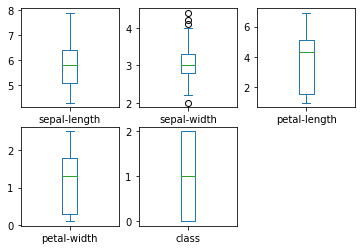

In [17]:
dataset.plot(kind='box',subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

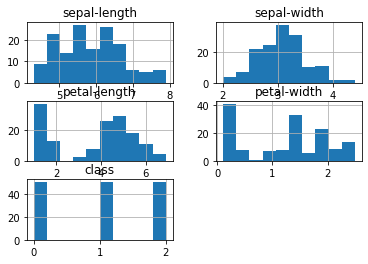

In [18]:
dataset.hist()
plt.show()

In [20]:
seed = 1
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.2,random_state=seed)

In [21]:
seed = 6
scoring = 'accuracy'

In [25]:
##Spot Check Algorithms

models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

##evaluate each model
result = []
names  = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"%(name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.066667)
SVM: 0.966667 (0.040825)
